In [387]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics

%matplotlib inline

## Load the data
The read_csv() function can now be used to load the dataset into pandas and mount it to a disk. This allows Colab to access the drive and transforms the CSV file into a Pandas dataframe.

In [388]:
# from google.colab import drive
# drive.mount('/content/drive')
df = pd.read_csv("final_data.csv")

## View the dataframe
The shape, head, tail, and columns methods of the panadas functions allow us to quickly gauge the size of our dataset. These techniques help us gain a deeper understanding of the data.


df.head(2)

In [389]:
df.shape

(10754, 22)

In [390]:
df.head(5)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [391]:
df.dtypes

player                  object
team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [392]:
df.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

## Profiling Data
The practice of thoroughly analyzing the data in an existing dataset and gathering statistics and information about it is known as data profiling.

# Preprocess The Data

In [393]:
df.describe()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
mean,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,0.004666,0.006826,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,0.025232,0.081143,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08,4.000000,1.000000


In [394]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

In [395]:
df["team"].value_counts(ascending=False)

team
Daejeon Hana Citizen      46
Jeonbuk Hyundai Motors    46
FC Seoul                  45
Gangwon FC                43
Daegu FC                  42
                          ..
FC Barcelona              22
Atlético de Madrid        22
CA Osasuna                22
Hatayspor                 12
Gaziantep FK               6
Name: count, Length: 374, dtype: int64

In [396]:
df["award"].value_counts(ascending=False)

award
0     4773
1     2211
2     1223
3      730
4      460
5      323
6      216
7      199
8      121
9      110
10      72
11      61
13      42
12      35
14      35
15      21
17      16
18      16
16      13
19      11
20      11
33       6
22       6
21       4
25       4
24       4
26       4
23       3
35       2
36       2
29       2
27       2
32       2
37       2
31       1
42       1
28       1
92       1
34       1
30       1
57       1
65       1
53       1
38       1
43       1
90       1
Name: count, dtype: int64

In [397]:
df["winger"].unique()

array([0, 1], dtype=int64)

In [398]:
df["position_encoded"].unique()

array([1, 2, 3, 4], dtype=int64)

In [399]:
df["height"].unique()

array([189.       , 196.       , 188.       , 175.       , 191.       ,
       194.       , 187.       , 185.       , 186.       , 178.       ,
       169.       , 180.       , 183.       , 182.       , 177.       ,
       184.       , 181.       , 179.       , 172.       , 174.       ,
       197.       , 195.       , 190.       , 176.       , 170.       ,
       192.       , 167.       , 198.       , 199.       , 193.       ,
       165.       , 200.       , 173.       , 163.       , 171.       ,
       168.       , 166.       , 202.       , 181.2403529, 164.       ,
       206.       , 160.       , 204.       , 156.       , 162.       ,
       159.       , 161.       ])

In [400]:
df.shape

(10754, 22)

## Data Quality Checks
 involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable

Here are typical steps involved in checking data quality

 **1.Reliability** :

Evaluate the data's source and collection process to determine its trustworthiness

In [401]:
# Licensed in kaggle

**2.Timeliness**:
 Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis

In [402]:
#in 2 season 2021-2022 and 2022-2023

**3.Consistency**:

*Confirm* that the data is consistent within the dataset and across multiple data sources.For example, the same data point should not have different values in different places

In [403]:
#Consistent

**4.Relevance:**

Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**The following are important factors for relevance:**

1. Sample Appropriateness: Verify that the goals of your analysis are met by the data sample you have chosen. For example, using statistics from the Northern region will not provide reliable information for the Kingdom's Western region.


2. Variable Selection: We can use the drop() technique to remove any columns that are irrelevant to our study. Since we are working with columns, we will set the "axis" parameter to 1. To make the change permanent, we will set the "inplace" argument to True.





In [404]:
# the data is relevant

**5. Uniqueness:**

Check for and remove duplicate records to prevent skewed analysis results.

In [405]:
df.duplicated().sum()
# no duplicates columns

0

In [406]:
df.isnull().sum()

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

In [407]:
# check columns types
df.dtypes

player                  object
team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [408]:
df.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

In [409]:
df.shape

(10754, 22)

In [410]:
# uniqeness
df.drop_duplicates(inplace=True)
df[df.duplicated()]

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger


In [411]:
# Completeness
df.isnull().sum()

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

In [412]:
# Accurecy types
df.dtypes

player                  object
team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

(array([1229.,    0.,    0.,    0.,    0.,    0., 3528.,    0.,    0.,
           0.,    0.,    0.,    0., 3095.,    0.,    0.,    0.,    0.,
           0., 2902.]),
 array([1.  , 1.15, 1.3 , 1.45, 1.6 , 1.75, 1.9 , 2.05, 2.2 , 2.35, 2.5 ,
        2.65, 2.8 , 2.95, 3.1 , 3.25, 3.4 , 3.55, 3.7 , 3.85, 4.  ]),
 <BarContainer object of 20 artists>)

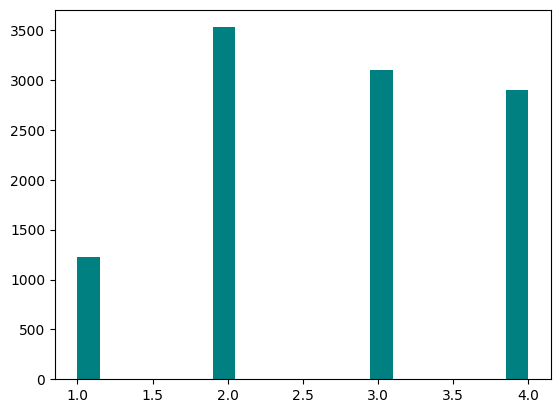

In [413]:
plt.hist(df["position_encoded"], bins=20, color='teal')

(array([4773.,    0., 2211.,    0.,    0., 1223.,    0.,    0.,  730.,
           0.,    0.,  460.,    0.,    0.,  323.,    0.,    0.,  216.,
           0.,  199.]),
 array([0.  , 0.35, 0.7 , 1.05, 1.4 , 1.75, 2.1 , 2.45, 2.8 , 3.15, 3.5 ,
        3.85, 4.2 , 4.55, 4.9 , 5.25, 5.6 , 5.95, 6.3 , 6.65, 7.  ]),
 <BarContainer object of 20 artists>)

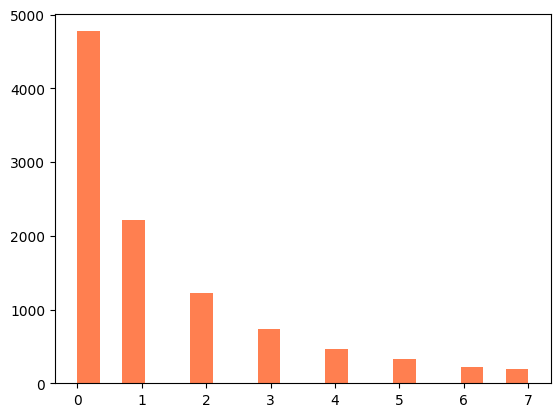

In [414]:
df= df[df["award"] <=7]
plt.hist(df["award"], bins=20, color='coral')

(array([4974., 1127.,  847.,  572.,  412.,  369.,  305.,  257.,  275.,
         203.,  176.,  124.,   91.,   70.,   84.,   46.,   30.,   26.,
          25.,   15.]),
 array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
        0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 ]),
 <BarContainer object of 20 artists>)

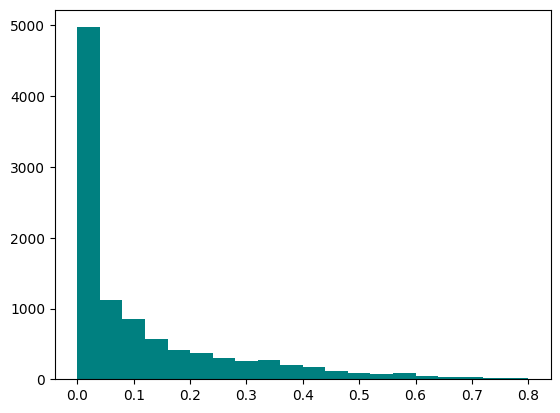

In [415]:
df = df[df["goals"] <= 0.80]
plt.hist(df["goals"], bins=20, color='teal')

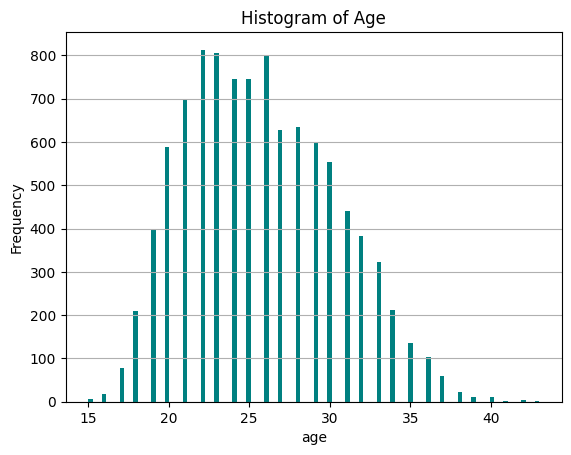

In [416]:
plt.hist(df['age'], bins=100, color='teal')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.grid(axis='y')

In [417]:
df.drop(columns=["name", "player", "position_encoded","winger", "second yellow cards","team"], inplace=True)

In [418]:
#drop whatever doesn't consider normal as a football player desription

df.drop(df[(df['age'] <= 18) | (df['age'] >= 40)].index, inplace=True)
df.drop(df[(df['current_value'] == 0) | (df['highest_value'] == 0)].index, inplace=True)
df.drop(df[(df['appearance'] == 0.00)].index, inplace=True)
df.drop(df[(df['height'] <= 140) | (df['height'] > 200)].index, inplace=True)
df.drop(df[(df['current_value'] >= 9000000) | (df['current_value'] < 10000)].index, inplace=True)
df.drop(df[(df['highest_value'] <= 2000) | (df['highest_value'] > 30000000)].index, inplace=True)
df.drop(df[(df['goals'] == 0.00)].index, inplace=True)

In [419]:
df.shape

(4879, 16)

(array([2113.,    0., 1165.,    0.,    0.,  639.,    0.,    0.,  382.,
           0.,    0.,  205.,    0.,    0.,  181.,    0.,    0.,  104.,
           0.,   90.]),
 array([0.  , 0.35, 0.7 , 1.05, 1.4 , 1.75, 2.1 , 2.45, 2.8 , 3.15, 3.5 ,
        3.85, 4.2 , 4.55, 4.9 , 5.25, 5.6 , 5.95, 6.3 , 6.65, 7.  ]),
 <BarContainer object of 20 artists>)

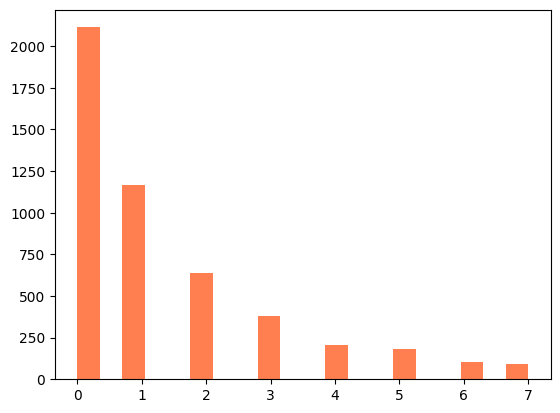

In [420]:
df= df[df["award"] <=7]
plt.hist(df["award"], bins=20, color='coral')

(array([907., 905., 656., 433., 355., 288., 243., 201., 212., 156., 138.,
         85.,  75.,  57.,  59.,  31.,  24.,  23.,  19.,  12.]),
 array([0.01071046, 0.05017494, 0.08963941, 0.12910389, 0.16856837,
        0.20803285, 0.24749732, 0.2869618 , 0.32642628, 0.36589075,
        0.40535523, 0.44481971, 0.48428418, 0.52374866, 0.56321314,
        0.60267762, 0.64214209, 0.68160657, 0.72107105, 0.76053552,
        0.8       ]),
 <BarContainer object of 20 artists>)

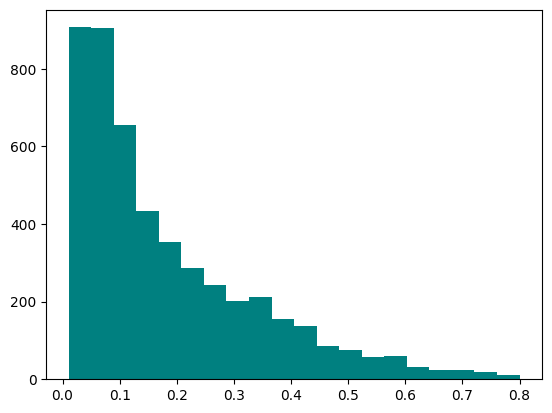

In [421]:
df = df[df["goals"] <= 0.80]
plt.hist(df["goals"], bins=20, color='teal')

In [422]:
least_frequent_positions = df['position'].value_counts().nsmallest(7).index
df['position'] = df['position'].apply(lambda x: 'Other' if x in least_frequent_positions else x)

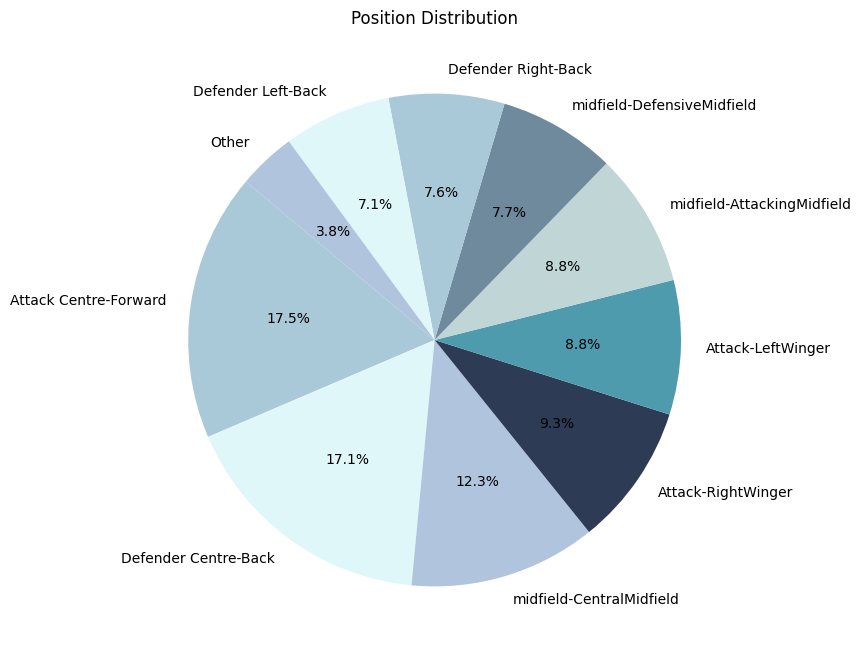

In [423]:
position_counts = df['position'].value_counts()

# Lighter shades of Navy (lighter, pastel-like blues)
light_navy_shades = [
     '#A9C9D9',  # Icy Blue (light)
    '#E0F7FA',  # Snowy White (very light, frosty)
    '#B0C4DE',  # Light Steel Blue (frosty tone)
    '#2E3B55',  # Deep Winter Blue (almost navy)
    '#4F9BAE',  # Winter Sky Blue (muted)
    '#C0D6D6',  # Frosty Grey (pale blue-grey)
    '#6F8A9D'   # Cool Steel Blue (muted blue)
]

# Plotting the pie chart with lighter navy shades
plt.figure(figsize=(8, 8))
plt.pie(position_counts, labels=position_counts.index, autopct='%1.1f%%', startangle=140,
        colors=light_navy_shades)

# Adding title
plt.title('Position Distribution')

# Show the plot
plt.show()


**B. Feature engineering**


1.Feature scaling            
2.Aggregation                        
3.One hot coding


In [424]:
df.head(2)

,position,height,age,appearance,goals,assists,yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value
20,midfield-CentralMidfield,181.0,20.0,39,0.129125,0.064562,0.225968,0.0,0.0,0.0,2788,0,0,1,800000,800000
37,Defender Centre-Back,191.0,35.0,42,0.027060,0.000000,0.108238,0.0,0.0,0.0,3326,664,87,5,1000000,13000000


In [425]:
categorical_features = ['position']
numeric_features = ['height', 'age', 'appearance', 'goals', 'assists',
       'yellow cards','red cards', 'goals conceded',
       'clean sheets', 'minutes played', 'days_injured', 'games_injured',
       'award', 'current_value', 'highest_value']

In [426]:
for i in categorical_features:
    print (df[i].value_counts())

position
Attack Centre-Forward         856
Defender Centre-Back          833
midfield-CentralMidfield      599
Attack-RightWinger            455
Attack-LeftWinger             430
midfield-AttackingMidfield    429
midfield-DefensiveMidfield    376
Defender Right-Back           370
Defender Left-Back            345
Other                         186
Name: count, dtype: int64


In [427]:
# one hot coding
df = pd.get_dummies(df, columns=categorical_features)

In [428]:
df.shape

(4879, 25)

In [429]:
df.head(2)

,height,age,appearance,goals,assists,yellow cards,red cards,goals conceded,clean sheets,minutes played,...,position_Attack Centre-Forward,position_Attack-LeftWinger,position_Attack-RightWinger,position_Defender Centre-Back,position_Defender Left-Back,position_Defender Right-Back,position_Other,position_midfield-AttackingMidfield,position_midfield-CentralMidfield,position_midfield-DefensiveMidfield
20,181.0,20.0,39,0.129125,0.064562,0.225968,0.0,0.0,0.0,2788,...,False,False,False,False,False,False,False,False,True,False
37,191.0,35.0,42,0.027060,0.000000,0.108238,0.0,0.0,0.0,3326,...,False,False,False,True,False,False,False,False,False,False


In [430]:
# Calculate the 25th and 85th percentiles of 'current_value'
p25 = df['current_value'].quantile(0.25)
p75 = df['current_value'].quantile(0.75)

# Function to categorize 'current_value' based on percentiles
def categorize_current_value(current_value):
    if current_value < p25:
        return 'Cheap'
    elif current_value < p75:
        return 'Moderate'
    else:
        return 'Expensive'

# Apply the function to create a new column 'current_value_category'
df['current_value_category'] = df['current_value'].apply(categorize_current_value)

# Optionally, drop the original 'current_value' column
df.drop('current_value', axis=1, inplace=True)

# Verify the distribution of the new categories
print(df['current_value_category'].value_counts())

current_value_category
Moderate     2523
Expensive    1326
Cheap        1030
Name: count, dtype: int64


In [431]:
p25, p75

(400000.0, 2500000.0)

In [432]:
encoder = LabelEncoder()
df['current_value_category'] = encoder.fit_transform(df['current_value_category'])

In [433]:
df.columns

Index(['height', 'age', 'appearance', 'goals', 'assists', 'yellow cards',
       'red cards', 'goals conceded', 'clean sheets', 'minutes played',
       'days_injured', 'games_injured', 'award', 'highest_value',
       'position_Attack Centre-Forward', 'position_Attack-LeftWinger',
       'position_Attack-RightWinger', 'position_Defender Centre-Back',
       'position_Defender Left-Back', 'position_Defender Right-Back',
       'position_Other', 'position_midfield-AttackingMidfield',
       'position_midfield-CentralMidfield',
       'position_midfield-DefensiveMidfield', 'current_value_category'],
      dtype='object')

 **C. Feature selection**

In [434]:
correlation = df.corr(numeric_only=True)
print(correlation['current_value_category'].sort_values(ascending=False))

current_value_category                 1.000000
appearance                             0.139208
minutes played                         0.132906
age                                    0.095833
games_injured                          0.078330
award                                  0.075982
days_injured                           0.069484
assists                                0.059818
position_midfield-AttackingMidfield    0.028822
position_midfield-DefensiveMidfield    0.019239
highest_value                          0.015890
position_Attack-RightWinger            0.011297
yellow cards                           0.004458
red cards                              0.004194
position_Defender Left-Back            0.001433
position_Attack-LeftWinger             0.001287
position_Defender Right-Back           0.000756
position_Defender Centre-Back         -0.003352
height                                -0.006847
goals conceded                        -0.009930
position_Attack Centre-Forward        -0

In [438]:
# Set the correlation threshold
threshold = 0.07 # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['current_value_category']) > \
threshold]['current_value_category'].index
selected_features

Index(['age', 'appearance', 'minutes played', 'games_injured', 'award',
       'current_value_category'],
      dtype='object')

In [188]:
selected_features =['age', 'appearance', 'minutes played', 'games_injured', 'award',
       'current_value_category']

In [439]:
df.columns

Index(['height', 'age', 'appearance', 'goals', 'assists', 'yellow cards',
       'red cards', 'goals conceded', 'clean sheets', 'minutes played',
       'days_injured', 'games_injured', 'award', 'highest_value',
       'position_Attack Centre-Forward', 'position_Attack-LeftWinger',
       'position_Attack-RightWinger', 'position_Defender Centre-Back',
       'position_Defender Left-Back', 'position_Defender Right-Back',
       'position_Other', 'position_midfield-AttackingMidfield',
       'position_midfield-CentralMidfield',
       'position_midfield-DefensiveMidfield', 'current_value_category'],
      dtype='object')

In [440]:
df.head()

,height,age,appearance,goals,assists,yellow cards,red cards,goals conceded,clean sheets,minutes played,...,position_Attack-LeftWinger,position_Attack-RightWinger,position_Defender Centre-Back,position_Defender Left-Back,position_Defender Right-Back,position_Other,position_midfield-AttackingMidfield,position_midfield-CentralMidfield,position_midfield-DefensiveMidfield,current_value_category
20,181.0,20.0,39,0.129125,0.064562,0.225968,0.000000,0.0,0.0,2788,...,False,False,False,False,False,False,False,True,False,2
37,191.0,35.0,42,0.027060,0.000000,0.108238,0.000000,0.0,0.0,3326,...,False,False,True,False,False,False,False,False,False,2
39,170.0,33.0,80,0.028033,0.140165,0.112132,0.028033,0.0,0.0,6421,...,False,False,False,True,False,False,False,False,False,1
44,178.0,24.0,74,0.019876,0.039753,0.337898,0.000000,0.0,0.0,4528,...,False,False,False,False,False,False,False,True,False,1
47,167.0,30.0,69,0.220103,0.110051,0.176082,0.000000,0.0,0.0,4089,...,False,False,False,False,False,False,True,False,False,1


## Data should be prepared.

In [441]:
X = df.drop(['current_value_category'], axis=1)
y = df['current_value_category']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [442]:
X.shape

(4879, 24)

## Buliding the Model

In [443]:
model = KNeighborsClassifier()

In [444]:
param_grid = {
    'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]
}
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1_macro',
                           verbose=1)

## Train the Model

In [195]:
# Fit the model on the training data
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='f1_macro', verbose=1)

In [196]:
grid_search.best_params_

{'n_neighbors': 6}

In [197]:
model = grid_search.best_estimator_

### Test the Model

In [198]:
# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)

## Evaluating the Model

In [199]:
# our benchmark model
base_model = round(df['current_value_category'].value_counts()[1]/df.shape[0]*100, 2)
base_model


35.25

Accuracy

In [200]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.5665983606557377

In [201]:
y_pred_train = model.predict(X_train_scaled)
accuracy = accuracy_score(y_train, y_pred_train)
accuracy

0.7199590058929028

In [202]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[ 91,  16,  90],
       [ 29, 225,  95],
       [109,  84, 237]], dtype=int64)

In [203]:
print("Train classification report for best knn:")
print(f' {classification_report(y_train, y_pred_train, labels=list(model.classes_))}')
print("Test classification report for best knn: ")
print(f'{classification_report(y_test, y_pred, labels=list(model.classes_))}')

Train classification report for best knn:
               precision    recall  f1-score   support

           0       0.63      0.62      0.63       833
           1       0.79      0.78      0.78      1371
           2       0.71      0.72      0.72      1699

    accuracy                           0.72      3903
   macro avg       0.71      0.71      0.71      3903
weighted avg       0.72      0.72      0.72      3903

Test classification report for best knn: 
              precision    recall  f1-score   support

           0       0.40      0.46      0.43       197
           1       0.69      0.64      0.67       349
           2       0.56      0.55      0.56       430

    accuracy                           0.57       976
   macro avg       0.55      0.55      0.55       976
weighted avg       0.58      0.57      0.57       976



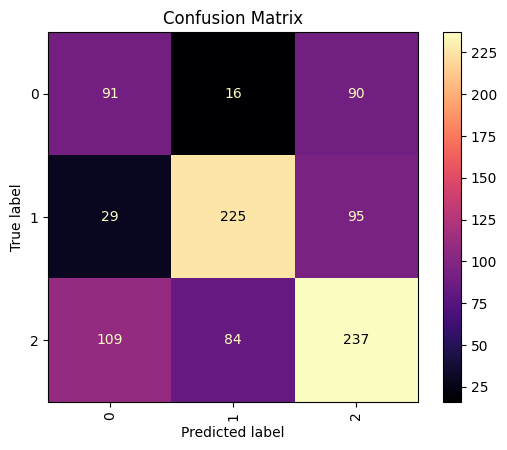

In [204]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                        display_labels=model.classes_,
                                        cmap="magma",
                                        xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

In [205]:
# Calculate Precision
precision = precision_score(y_test, y_pred, average='macro')
print(f"Precision: {precision:.2f}")

Precision: 0.55


In [206]:
# Calculate Recall
recall = recall_score(y_test, y_pred, average='macro')
print(f"Recall: {recall:.2f}")

Recall: 0.55


In [207]:
# Calculate F1 Score
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.55


In [208]:
print(classification_report(y_test,
                      y_pred,
                      labels=list(model.classes_)))

              precision    recall  f1-score   support

           0       0.40      0.46      0.43       197
           1       0.69      0.64      0.67       349
           2       0.56      0.55      0.56       430

    accuracy                           0.57       976
   macro avg       0.55      0.55      0.55       976
weighted avg       0.58      0.57      0.57       976



In [209]:
import joblib
joblib.dump(model, 'knn_model.joblib')
joblib.dump(scaler, 'scaler1.joblib')

['scaler1.joblib']